In [1]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
with open("./Output/colbert_results", "rb") as file:
    colbert_results = pickle.load(file)

with open("./Output/vsm_results_1", "rb") as file:
    vsm_results_1 = pickle.load(file)

with open("./Output/vsm_results_2", "rb") as file:
    vsm_results_2 = pickle.load(file)

In [3]:

# Reading the queries
data = pd.read_csv('Relevant_20', header=None)

# Parse the data and create a dictionary

relevant = []

for line in data[0]:  # Assuming the queries are in the first column
 
   relevant_docs = list(map(int, line.split()))
   relevant.append(relevant_docs)

In [4]:
def recall_precision_curve(result_docs, relevant):

    RP = []
    # result_docs is an array with vector space most relevant docs for each query and relevant is an array with the true relevant
    for i in range(len(result_docs)):

        # Initialize variables for precision, recall, and true positives
        precision_values = []
        recall_values = []
        true_positives = 0

        # Iterate over retrieved documents
        for j, doc in enumerate(result_docs[i]):
            if doc in relevant[i]:
                true_positives += 1

                # Calculate precision and recall at this point
                precision = true_positives /(j+1)
                recall = true_positives / len(relevant[i]) 

                precision_values.append(precision)
                recall_values.append(recall)

        RP.append((recall_values, precision_values))
    
    
    return RP


In [5]:
vsm_rp_1 = recall_precision_curve(vsm_results_1, relevant)
vsm_rp_2 = recall_precision_curve(vsm_results_2, relevant)
colbert_rp = recall_precision_curve(colbert_results, relevant)

In [7]:
def mean_average_precision(rp):
    ap_values=[]
    for i in range(len(rp)):
        ap=0
        recall_values,precision_values=rp[i]

        for j in range(1,len(recall_values)):
            ap += (recall_values[j] - recall_values[j- 1]) * precision_values[j]
        ap_values.append(ap)
    return np.mean(ap_values)

In [8]:

map_vsm1=mean_average_precision(vsm_rp_1)
map_vsm2=mean_average_precision(vsm_rp_2)
map_colbert=mean_average_precision(colbert_rp)

In [10]:
print('MAP Values:')
print('VSM 1:'+ str(map_vsm1))
print('VSM 2:'+ str(map_vsm2))
print('colBERT: '+ str(map_colbert))

MAP Values:
VSM 1:0.17800091610517815
VSM 2:0.17254434684687806
colBERT: 0.18149837318722956


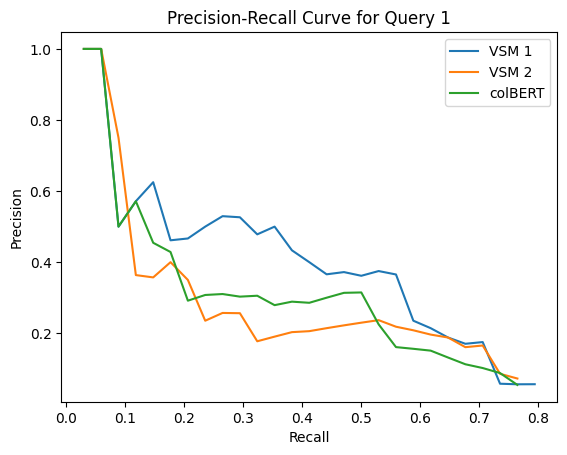

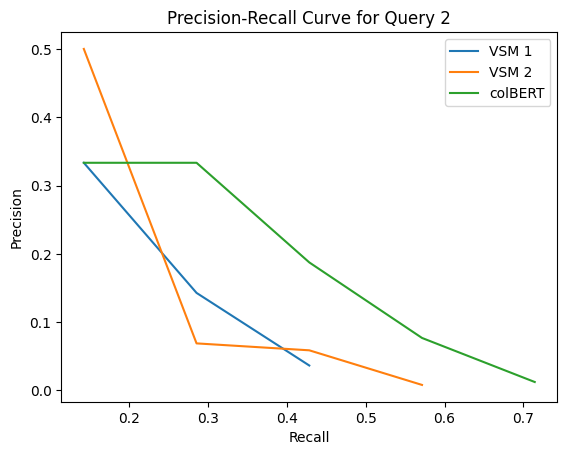

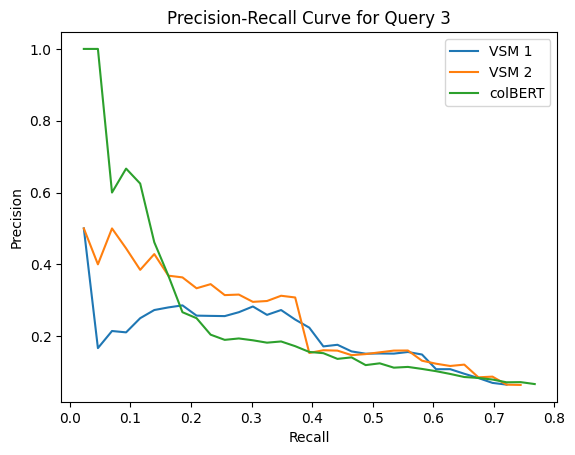

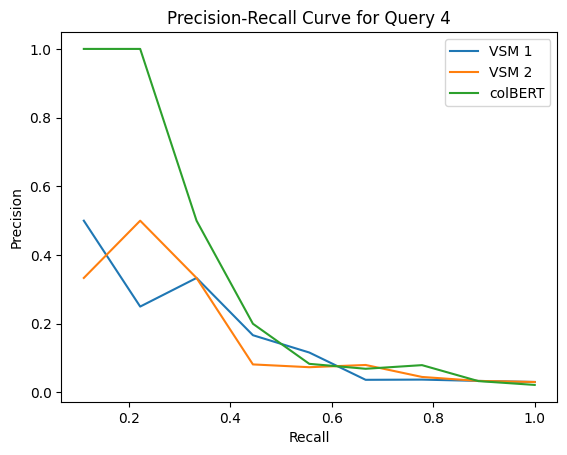

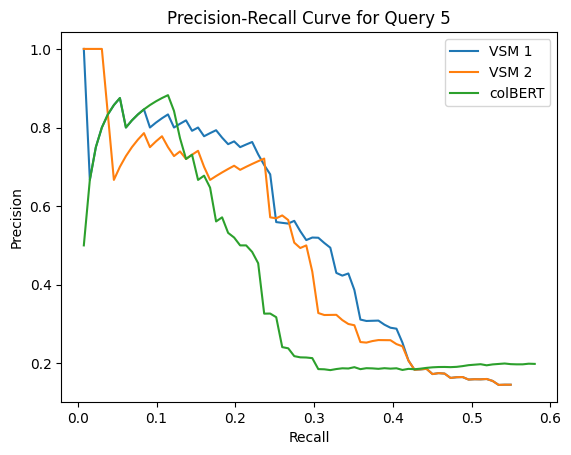

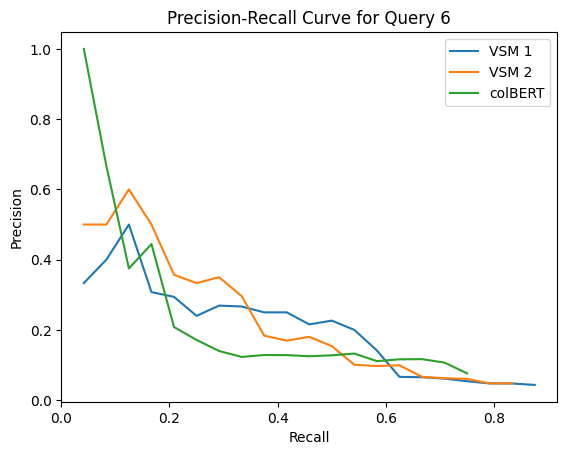

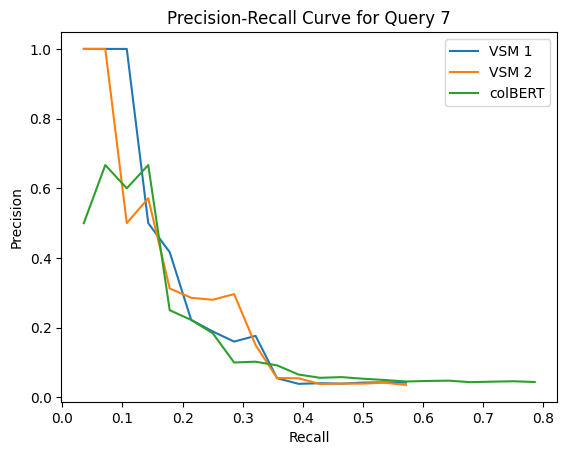

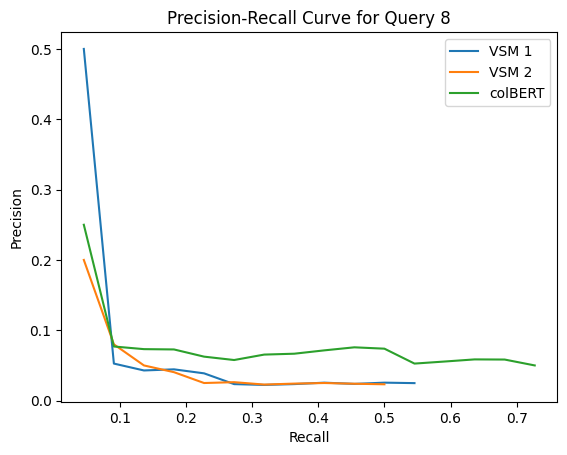

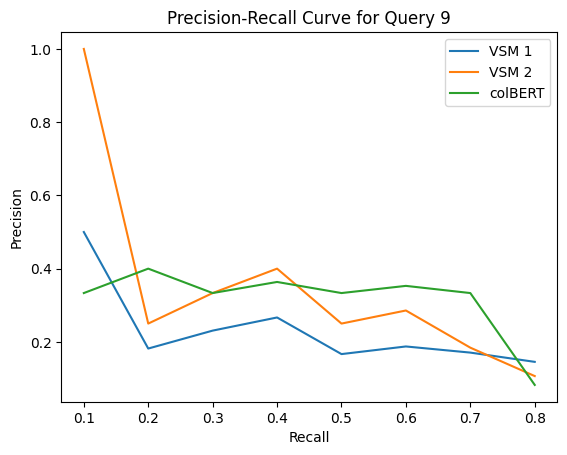

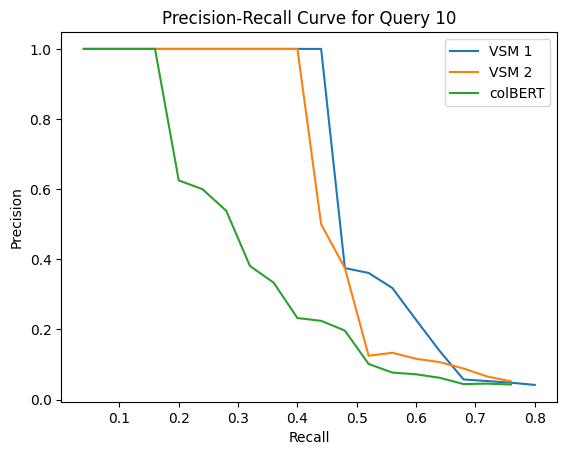

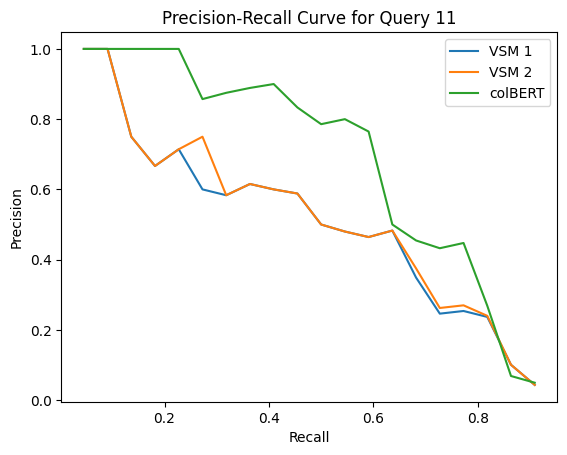

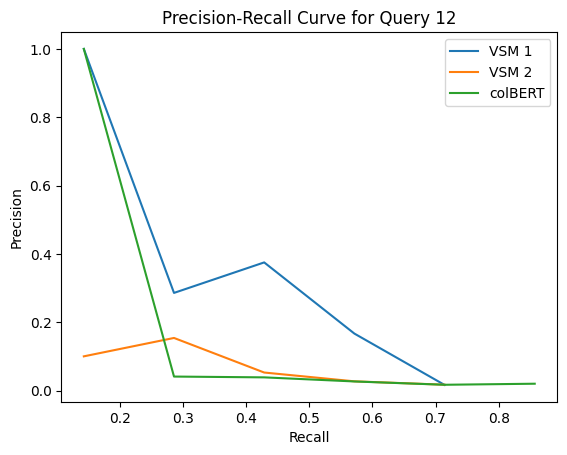

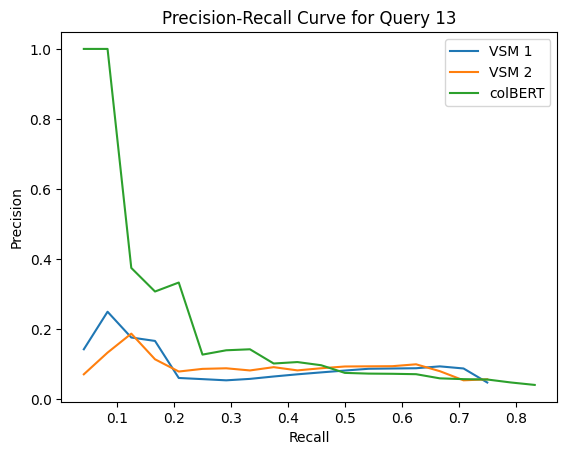

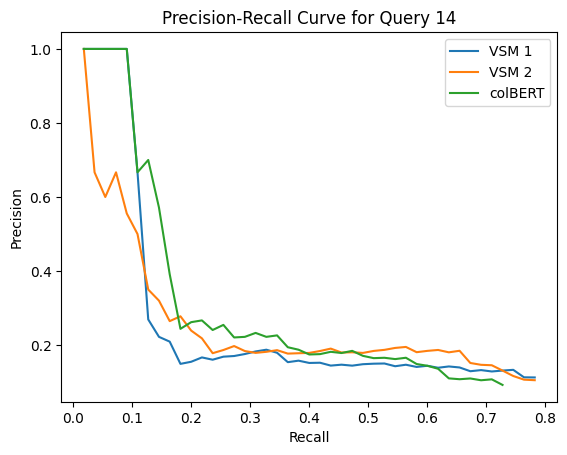

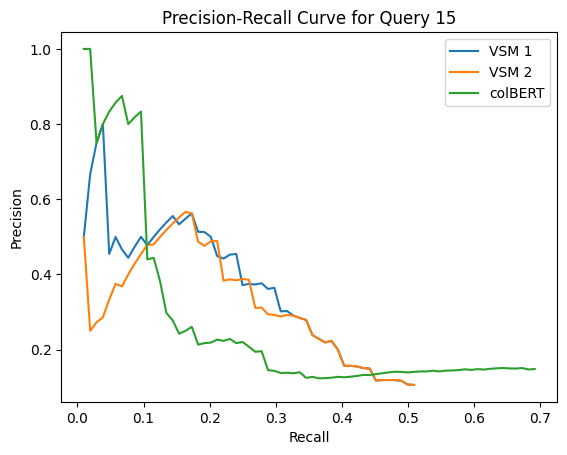

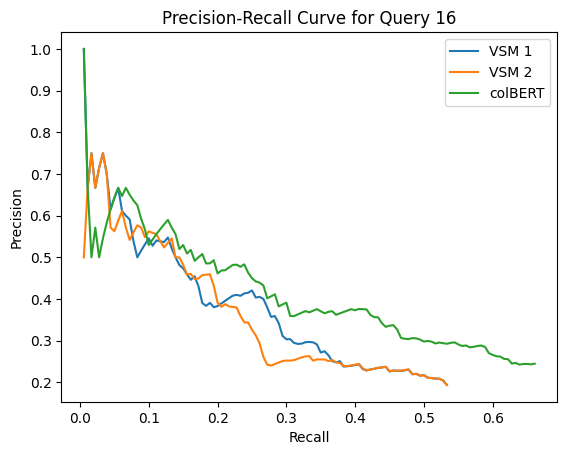

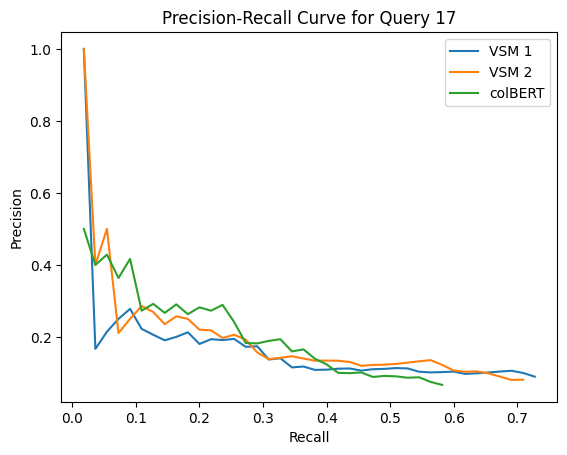

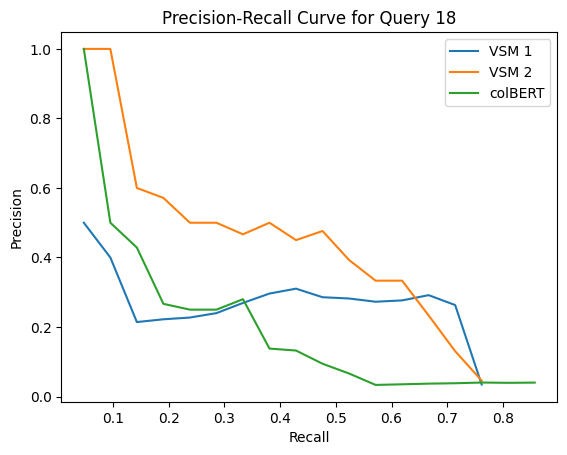

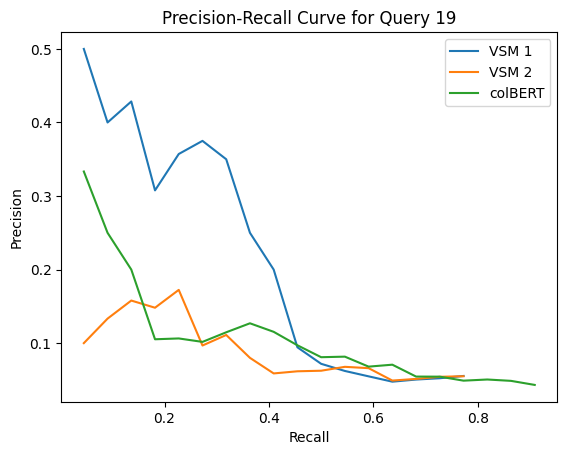

In [11]:
for i in range(len(vsm_rp_1)):
    plt.figure()
    plt.plot(vsm_rp_1[i][0], vsm_rp_1[i][1], label= "VSM 1")
    plt.plot(vsm_rp_2[i][0], vsm_rp_2[i][1], label= "VSM 2")
    plt.plot(colbert_rp[i][0], colbert_rp[i][1], label= "colBERT")
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve for Query {i + 1}')
    plt.legend(loc='upper right')
    plt.savefig('./Graphs/rpc_q_'+ str(i+1) +'.png')